![image.png](attachment:image.png)

## PRACTICA OBLIGATORIA: **Transfer Learning y Fine Tuning con CNN**

* La práctica obligatoria de esta unidad consiste en un repetir el ejercicio de construcción de un modelo de clasificación de paisajes pero usando un modelo preentrenado. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo.
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
# Ajusta la ruta si lo guardaste en otro sitio de tu Drive
data = np.load('/content/drive/MyDrive/Colab Notebooks/Xy_data.npz')

# Recupera las variables
X_train = data['X_train']
X_test = data['X_test']
y_train_num = data['y_train_num']
y_test_num = data['y_test_num']

In [18]:

targets = pd.Series(y_train_num)
targets.value_counts(True)

,proportion
0,0.178994
2,0.171298
5,0.169731
4,0.162035
1,0.161821
3,0.156121


### Objetivo del ejercicio

Comparar una red convolucional hecha ad-hoc frente a los modelos preentrenados y ajustados con fine tuning y transfer learning. Para ello emplea el dataset de paisajes del conjunto de ejercicios de la unidad anterior.


### Se pide

1. Preparar los datos del modelo y las funciones de visualización, copia para ello todo lo que necesites de las soluciones del ejercicio de clasificación de paisajes de la unidad anterior.

2. Escoger entre uno de los modelos VGG-19, InceptionV3 y MobileNetV2 (todos en https://keras.io/api/applications/) (Se aconseja este último si no tenemos un ordenador muy potente). Si no te haces con estos puedes recurrir a la ResNetV50.

4. Hacer un transfer-learning con una cabeza de como mucho 2 capas densas ocultas y una de salida. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

5. Hacer un fine-tuning con la misma cabeza diseñada en el punto anterior. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

6. Comparar los resultados con los obtenidos con la red convolucional del ejercicio mencionado.

EXTRA:
- Repetir el transfer learning empleando aumentado de imágenes.



In [7]:
# 1️⃣ Base preentrenada
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Transfer learning clásico

/tmp/ipython-input-7-1263451618.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# 2️⃣ Cabeza propia
inputs = Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs, outputs)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [12]:
history = model.fit(X_train, y_train_num,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=32,
                    callbacks=[early_stop])


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.4031 - loss: 1.4888 - val_accuracy: 0.5148 - val_loss: 1.2221
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.5286 - loss: 1.2047 - val_accuracy: 0.5141 - val_loss: 1.2084
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.5483 - loss: 1.1641 - val_accuracy: 0.5301 - val_loss: 1.1842
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.5487 - loss: 1.1365 - val_accuracy: 0.5212 - val_loss: 1.1924
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.5675 - loss: 1.1005 - val_accuracy: 0.5326 - val_loss: 1.1746
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.5843 - loss: 1.0600 - val_accuracy: 0.5319 - val_loss: 1.1795
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.5927 - loss: 1.0391 - val_accuracy: 0.5290 - val_loss: 1.1741
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.5955 - loss: 1.0292 - 

In [13]:
# Evaluamos fine-tuning
model.evaluate(X_test, y_test_num)

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5620 - loss: 1.1271


[1.1900303363800049, 0.5286666750907898]

In [14]:
y_pred = [ np.argmax(prediction) for prediction in model.predict(X_test)]

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step


In [19]:
mapa = {tipo:indice for indice,tipo in enumerate(targets.unique())} # Rehusando la serie que creamos para ver la distribución del target
mapa

{np.int64(1): 0,
 np.int64(3): 1,
 np.int64(5): 2,
 np.int64(4): 3,
 np.int64(2): 4,
 np.int64(0): 5}

In [20]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
inverse_map = {valor:clave for clave,valor in mapa.items()}
y_test_labels = [inverse_map[y] for y in y_test_num]
y_pred_labels = [inverse_map[y] for y in y_pred]
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.47      0.51      0.49       501
           1       0.45      0.52      0.48       525
           2       0.52      0.44      0.48       510
           3       0.77      0.84      0.80       474
           4       0.51      0.52      0.52       437
           5       0.46      0.39      0.42       553

    accuracy                           0.53      3000
   macro avg       0.53      0.53      0.53      3000
weighted avg       0.53      0.53      0.53      3000



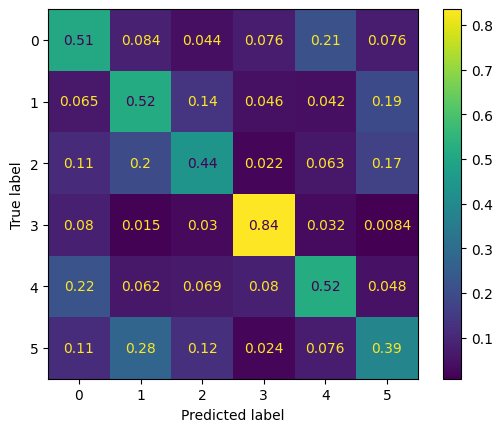

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels, normalize="true")